Compelete Camera Calibration Example with OpenCV
===================



In [1]:
import matplotlib
import matplotlib
matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2
import glob

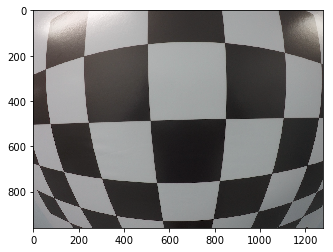

In [2]:
original_img = cv2.imread('test_image.jpg')
original_img_size = (original_img.shape[1], original_img.shape[0])
plt.imshow(original_img)
plt.show()

In [3]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
            30, 0.001)
# Arrays to store object points and image points from all the images
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Prepare object pionts, like(0, 0, 0), (1, 0, 0) , (2,0,0) ..,(6,5,0)
objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) # x, y coordinates

images = glob.glob('calibration/*.jpg')


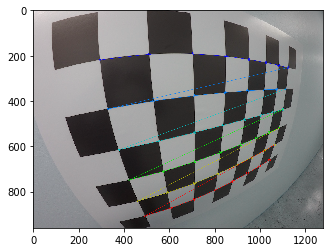

In [4]:
%matplotlib inline
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        
        cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                   imgpoints, 
                                                   original_img_size,
                                                   None,None)

## Undistort the image using ```cv2.undistort()``` with ```mtn``` and ```dist```

In [6]:
dst = cv2.undistort(original_img, mtx, dist, None, mtx)
cv2.imwrite('undistorted.jpg',dst)

True

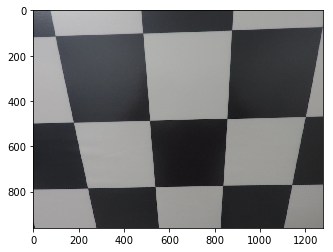

In [8]:
image_ = plt.imread('undistorted.jpg')
plt.imshow(image_)

In [9]:
# Save the camera calibration result for later use 
# (we won't worry about rvecs / tvecs)
import pickle
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, 
            open( "dist_pickle.p", "wb" ))

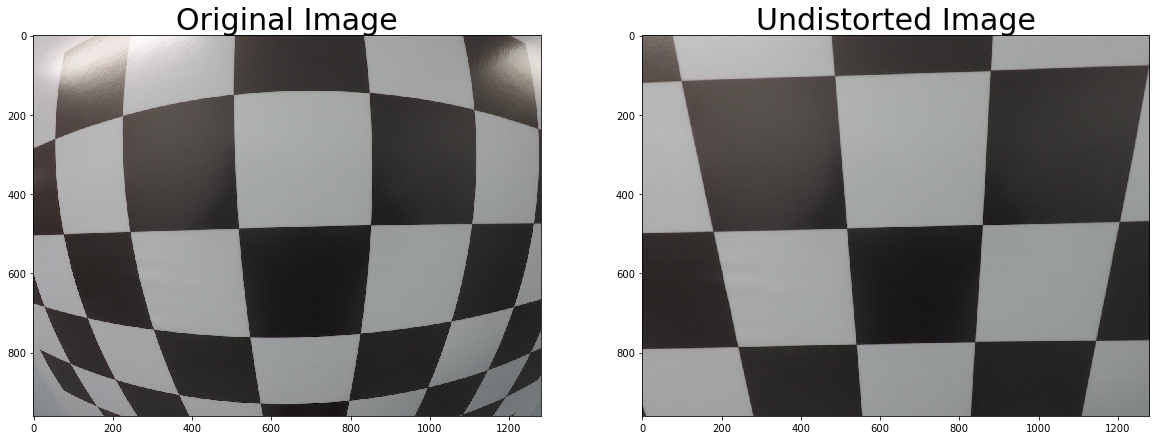

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(original_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [15]:
%matplotlib qt5
plt.imshow(image_)

## Define 4 source points(the outer 4 corners detected in the chessboard pattern)

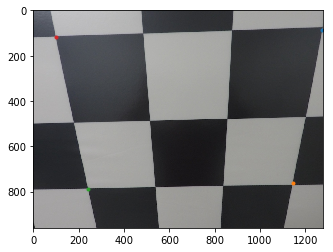

In [18]:
# Source image points
%matplotlib inline
plt.imshow(image_)
plt.plot(1273, 88, '.')  # top right
plt.plot(1145, 761, '.')  # bottom right
plt.plot(240, 787, '.')  # bottom left
plt.plot(99, 116, '.')  # top left


In [19]:
# define perspective transform function
def warp(img):
    
    # Define calibration box in source (original) and destination
    # (desired or warped) coordinates
    
    rows, cols, ch = img.shape
    
    # Four source coordinates
    src = np.float32(
                   [[1273, 88],
                    [1145, 761],
                    [240, 787],
                    [99, 116]])
    
    # Four desired coordinates
    dst = np.float32(
                    [[1145, 88],
                     [1145, 760],
                     [240, 787],
                     [240, 50]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Could compute the inverse also by swapping the input 
    # parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # create warped image - Uses linear interpolation
    warped = cv2.warpPerspective(img, M , (rows, cols), 
                                 flags=cv2.INTER_LINEAR)
    
    return warped


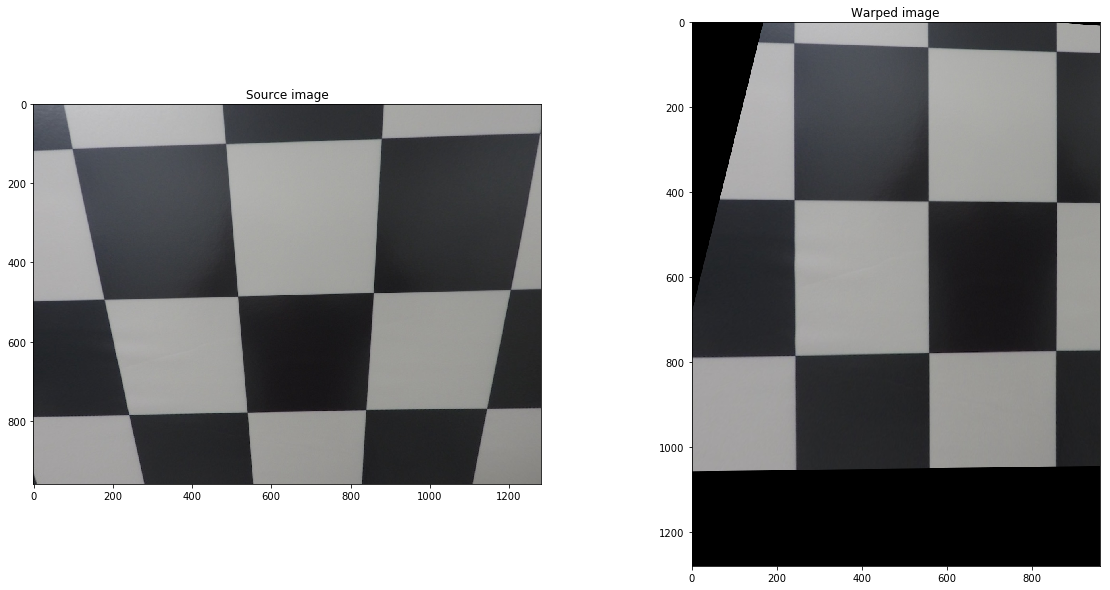

In [20]:
# Get perspective transform 
warped_img = warp(image_)


# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Source image')
ax1.imshow(image_)

ax2.set_title('Warped image')
ax2.imshow(warped_img)

plt.show()